In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.shape

(200, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
x = df[['Age','Spending Score (1-100)']]
x.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


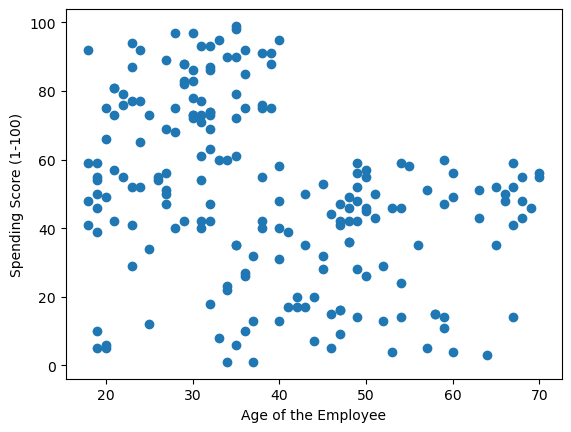

In [41]:
plt.scatter(x['Age'],x['Spending Score (1-100)'])
plt.xlabel('Age of the Employee')
plt.ylabel('Spending Score (1-100)')
plt.show()


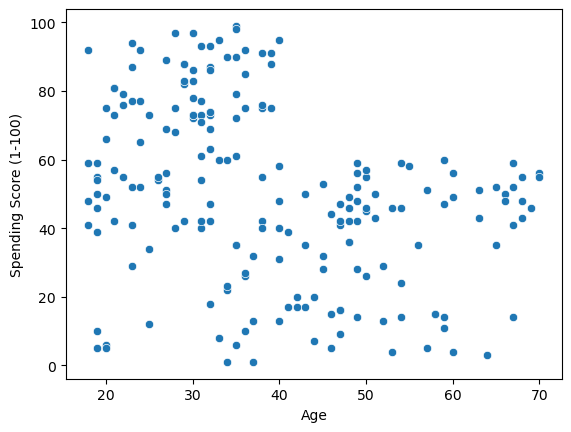

In [45]:
sns.scatterplot(x = x['Age'], y = x['Spending Score (1-100)'])
plt.show()

In [47]:
from sklearn.cluster import KMeans as km

In [49]:
error=[]
for i in range(1,11):
    model1=km(n_clusters=i)
    model1.fit(x)
    error.append(model1.inertia_)

In [51]:
error

[171535.5,
 75949.15601023019,
 45844.53681626928,
 28165.58356662934,
 23907.65915694681,
 19711.44945133103,
 17859.57918656731,
 14902.681203314656,
 12046.71094089226,
 10196.009977902531]

In [53]:
len(error)

10

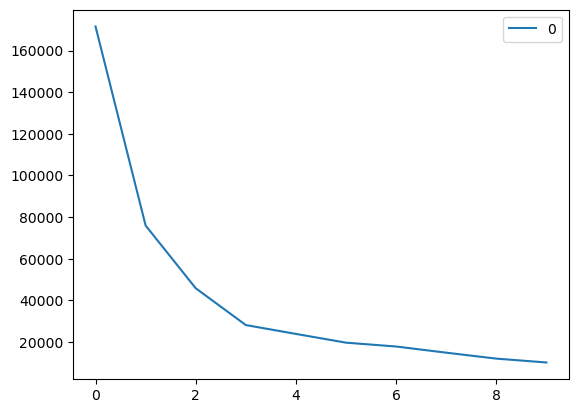

In [55]:
pd.DataFrame(error).plot()
plt.show()

In [57]:
model2=km(n_clusters=3)
model2.fit(x)

KMeans(n_clusters=3)

In [59]:
my_cluster=model2.labels_
my_cluster

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [61]:
complete_data=x.assign(cluster=my_cluster)
complete_data

,Age,Spending Score (1-100),cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

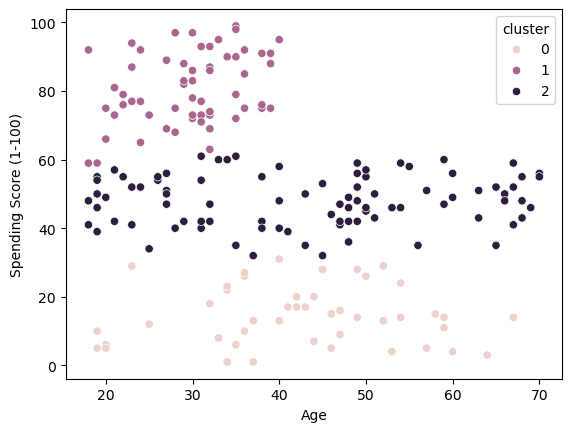

In [63]:
sns.scatterplot(x = complete_data['Age'], y = complete_data['Spending Score (1-100)'],hue=complete_data['cluster'])